In [1]:
tickers = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

# Download Data

To install yfinance, run the following in terminal:
```
$ pip install yfinance
```
    
[yfinance](https://pypi.org/project/yfinance/)

In [2]:
import yfinance as yf
import os
tickers_len = len(tickers)
for count, ticker in enumerate(tickers):
    if not os.path.exists('{}.csv'.format(ticker)):
        stock = yf.Ticker(ticker)
        data = stock.history(period='max')
        data.to_csv('{}.csv'.format(ticker))
        print('{}/{} : {} Downloaded'.format(count+1, tickers_len, ticker))
    else:
        print('{}/{} : {} Downloaded'.format(count+1, tickers_len, ticker))

1/5 : FB Downloaded
2/5 : AMZN Downloaded
3/5 : AAPL Downloaded
4/5 : NFLX Downloaded
5/5 : GOOG Downloaded


# Combine Close

In [3]:
import pandas as pd

df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    
    df_ = pd.read_csv('{}.csv'.format(ticker), 
                     index_col='Date',
                     parse_dates=True)
    df_.rename(columns={'Close':ticker}, inplace=True)
    
    df_.drop(['Open','High','Low','Volume','Dividends','Stock Splits'],
             axis=1,
             inplace=True)
    
    df_.dropna(inplace=True) # 배당 혹은 주식분할로 생기는 추가적인 가로열 제거
    
    if df.empty:
        df = df_
    else:
        df = df.join(df_, how='inner')
        
    print('{}/{} : {} added to df'.format(count+1, tickers_len, ticker))
    
df.dropna(inplace=True)

1/5 : FB added to df
2/5 : AMZN added to df
3/5 : AAPL added to df
4/5 : NFLX added to df
5/5 : GOOG added to df


In [4]:
df.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,38.23,213.85,16.37,9.99,299.08
2012-05-21,34.03,218.11,17.32,10.25,305.91
2012-05-22,31.00,215.33,17.19,9.67,299.28
2012-05-23,32.00,217.28,17.61,10.27,303.59
2012-05-24,33.03,215.24,17.45,10.04,300.70


In [5]:
df.tail()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-09-01,295.44,3499.12,134.18,556.55,1660.71
2020-09-02,302.50,3531.45,131.40,552.84,1728.28
2020-09-03,291.12,3368.00,120.88,525.75,1641.84
2020-09-04,282.73,3294.62,120.96,516.05,1591.04
2020-09-08,277.35,3220.73,117.41,518.52,1558.36


# Compute Daily Return

$$\begin{array}{ccc}
\mbox{Discrete Daily Return}&&r_t^{(D)}=\frac{S_t-S_{t-1}}{S_{t-1}}\\
\mbox{Continuous Daily Return}&&r_t^{(C)}=\log\frac{S_t}{S_{t-1}}\\
\end{array}$$

In [6]:
import numpy as np
df_return_d = df.pct_change() # 이산 데일리 리턴
df_return_c = np.log(df / df.shift(1)) # 연속 데일리 리턴

In [9]:
df_return_d.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN
2012-05-21,-0.109861,0.019921,0.058033,0.026026,0.022837
2012-05-22,-0.089039,-0.012746,-0.007506,-0.056585,-0.021673
2012-05-23,0.032258,0.009056,0.024433,0.062048,0.014401
2012-05-24,0.032188,-0.009389,-0.009086,-0.022395,-0.009519


In [10]:
df_return_d.tail()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-09-01,0.007640,0.013956,0.039833,0.050967,0.016234
2020-09-02,0.023897,0.009239,-0.020718,-0.006666,0.040687
2020-09-03,-0.037620,-0.046284,-0.080061,-0.049002,-0.050015
2020-09-04,-0.028820,-0.021787,0.000662,-0.018450,-0.030941
2020-09-08,-0.019029,-0.022427,-0.029349,0.004786,-0.020540


# 코릴레이션 계산

In [11]:
df_corr = df_return_d.corr()
df_corr

,FB,AMZN,AAPL,NFLX,GOOG
FB,1.000000,0.437329,0.380160,0.280716,0.486167
AMZN,0.437329,1.000000,0.430639,0.427938,0.599533
AAPL,0.380160,0.430639,1.000000,0.249194,0.516646
NFLX,0.280716,0.427938,0.249194,1.000000,0.398280
GOOG,0.486167,0.599533,0.516646,0.398280,1.000000


# Heatmap using seaborn

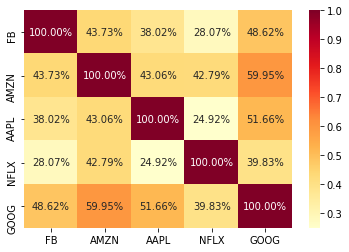

In [19]:
import seaborn as sns
sns.heatmap(df_corr, cmap='YlOrRd', annot=True, fmt='.2%')

# Reference

[[Python] 히트맵 그리기 (Heatmap by python matplotlib, seaborn, pandas)](https://rfriend.tistory.com/419)